<a href="https://colab.research.google.com/github/apasiii/Visualisasi-dan-prediksi-covid-19-menggunakan-metode-AR/blob/main/Visualisasi_Dan_Prediksi_Covid_19_DI_Jakarta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualisasi Dan Prediksi Covid-19 di Jakarta Mengunakan Metode Autoregressive (AR)







> Library yang digunakan
1.   Library pandas 
adalah library Python yang fokus untuk proses analisis data seperti   manipulasi data, persiapan data, dan pembersihan data.
2.   Library matplotlib 
      adalah library Python yang fokus pada visualisasi data seperti membuat plot grafik. 













In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Data-Data yang digunakan dalam Visualisasi dan Prediksi



> data  diambil dari website  https://data.humdata.org/dataset/indonesia-covid-19-cases-recoveries-and-deaths-per-province.

> Data ini dipilih karena memiliki data yang real dan telah tercantum dengan rinci untuk setiap tanggal dan bulan di tahun 2020

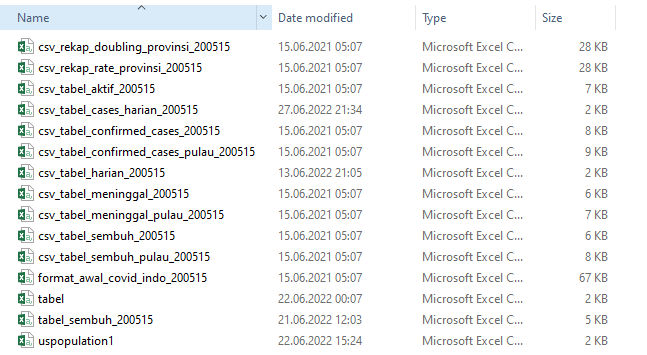





# Load Data/Memanggil Data yang akan digunakan



> **Load data tabel aktif**



In [2]:
#Memanggil data tabel aktif
from google.colab import files
uploaded = files.upload()
data_tabel_aktif  = pd.read_csv('csv_tabel_aktif_200515.csv')


Saving csv_tabel_aktif_200515.csv to csv_tabel_aktif_200515.csv







> **Menampilkan Data Tabel Aktif / Print Data Yang Sudah Di Load**





In [4]:
#menampilkan data sudah di Load
data_tabel_aktif


,Tanggal,Aceh,Bali,BangkaBelitung_,Banten,Bengkulu,CentralJava,CentralKalimantan,CentralSulawesi,EastJava,...,SouthSumatra,SoutheastSulawesi,Yogyakarta,WestJava,WestKalimantan,WestNusaTengg_,WestPapua,WestSulawesi,WestSumatra,UnderInvestigation
0,15-May-2020,3,107,21,404,50,805,129,87,1449,...,376,154,110,1237,104,163,85,50,284,21
1,14-May-2020,3,110,21,378,39,771,176,86,1418,...,359,147,110,1224,104,205,85,52,264,21
2,13-May-2020,4,108,21,366,38,728,183,79,1335,...,240,58,106,1234,104,223,67,59,237,21
3,12-May-2020,4,109,21,350,38,694,167,79,1256,...,206,58,99,1234,100,228,67,59,231,21
4,11-May-2020,5,100,21,339,35,685,156,68,1143,...,214,58,91,1185,105,232,67,55,226,21
5,10-May-2020,5,103,22,355,35,739,156,68,1129,...,214,58,86,1140,105,232,67,55,226,21
6,09-May-2020,5,105,21,345,35,720,152,60,1051,...,223,54,80,1140,103,237,52,55,215,21
7,08-May-2020,5,101,21,327,12,707,166,60,931,...,172,52,73,1128,81,238,52,53,207,21
8,07-May-2020,9,100,23,317,12,695,166,60,928,...,174,52,73,1109,81,238,52,51,195,22
9,06-May-2020,9,107,23,324,12,682,164,55,899,...,158,52,62,1053,79,231,52,52,184,22


In [5]:
data_tabel_aktif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Tanggal             58 non-null     object
 1   Aceh                58 non-null     int64 
 2   Bali                58 non-null     int64 
 3   BangkaBelitung_     58 non-null     int64 
 4   Banten              58 non-null     int64 
 5   Bengkulu            58 non-null     int64 
 6   CentralJava         58 non-null     int64 
 7   CentralKalimantan   58 non-null     int64 
 8   CentralSulawesi     58 non-null     int64 
 9   EastJava            58 non-null     int64 
 10  EastKalimantan      58 non-null     int64 
 11  EastNusaTenggara    58 non-null     int64 
 12  Gorontalo           58 non-null     int64 
 13  Jakarta             58 non-null     int64 
 14  Jambi               58 non-null     int64 
 15  Lampung             58 non-null     int64 
 16  Maluku              58 non-n

In [7]:
data_tabel_aktif.tail()

,Tanggal,Aceh,Bali,BangkaBelitung_,Banten,Bengkulu,CentralJava,CentralKalimantan,CentralSulawesi,EastJava,...,SouthSumatra,SoutheastSulawesi,Yogyakarta,WestJava,WestKalimantan,WestNusaTengg_,WestPapua,WestSulawesi,WestSumatra,UnderInvestigation
53,23-Mar-2020,0,0,0,52,0,12,2,0,40,...,0,3,4,45,2,0,0,0,0,8
54,22-Mar-2020,0,0,0,43,0,12,2,0,40,...,0,3,4,45,2,0,0,0,0,6
55,21-Mar-2020,0,0,0,40,0,11,2,0,24,...,0,3,5,47,2,0,0,0,0,0
56,20-Mar-2020,0,0,0,35,0,9,2,0,13,...,0,3,4,33,2,0,0,0,0,0
57,19-Mar-2020,0,0,0,25,0,9,0,0,8,...,0,3,5,24,2,0,0,0,0,0




> **Load Data Tabel Konfirmasi Kasus Covid-19**



In [6]:
#Memanggil data tabel konfirmasi kasus
from google.colab import files
uploaded = files.upload()
data_tabel_konfirmasi_kasus  = pd.read_csv('csv_tabel_confirmed_cases_200515.csv')


Saving csv_tabel_confirmed_cases_200515.csv to csv_tabel_confirmed_cases_200515.csv








> **Menampilkan Data Tabel Konfirmasi Kasus  / Print Data Yang Sudah Di Load**





In [7]:
#menampilkan data konfirmasi kasus
data_tabel_konfirmasi_kasus.head()

,Tanggal,Aceh,Bali,BangkaBelitung_,Banten,Bengkulu,CentralJava,CentralKalimantan,CentralSulawesi,EastJava,...,SouthSumatra,SoutheastSulawesi,Yogyakarta,WestJava,WestKalimantan,WestNusaTengg_,WestPapua,WestSulawesi,WestSumatra,UnderInvestigation
0,15-May-2020,17,343,29,622,53,1109,227,112,1921,...,458,183,188,1596,129,358,88,74,393,21
1,14-May-2020,17,337,29,593,42,1066,223,111,1863,...,441,167,185,1565,129,350,88,74,371,21
2,13-May-2020,17,332,29,580,40,1023,220,95,1772,...,322,76,181,1556,129,344,70,68,339,21
3,12-May-2020,17,328,29,559,40,989,204,95,1669,...,279,76,169,1545,123,339,70,68,319,21
4,11-May-2020,17,314,29,541,37,980,193,83,1536,...,278,76,159,1493,120,330,70,62,299,21




> **Load Data Meninggal**



In [8]:
#Memanggil data tabel meninggal
from google.colab import files
uploaded = files.upload()
data_tabel_meninggal  = pd.read_csv('csv_tabel_meninggal_200515.csv')


Saving csv_tabel_meninggal_200515.csv to csv_tabel_meninggal_200515.csv


In [9]:
#Memanggil data tabel semubh
from google.colab import files
uploaded = files.upload()
data_tabel_sembuh  = pd.read_csv('csv_tabel_sembuh_200515.csv')


Saving csv_tabel_sembuh_200515.csv to csv_tabel_sembuh_200515.csv


# Menu Program Visualisasi Dan Prediksi Covid-19 Di Jakarta



> Program terdiri dari 5 Menu 

1.   Visualisasi Kasus Terkonfirmasi Positif Covid
2.   Visualisasi Kasus Meninggal
3.   Visualisasi Kasus Sembuh
4.   Visualisasi Semua Kasus
5.   Visualisasi Prediksi Covid











Pilih kasus covid yang ingin di visualisasikan
1. Visualisasi Kasus Terkonfirmasi Positif Covid 
2. Visualisasi Kasus Meninggal
3. Visualisasi Kasus Sembuh
4. Visualisasi Semua Kasus
5. Visualisasi Prediksi Covid
Masukkan pilihan anda : 4


Data Semua Kasus


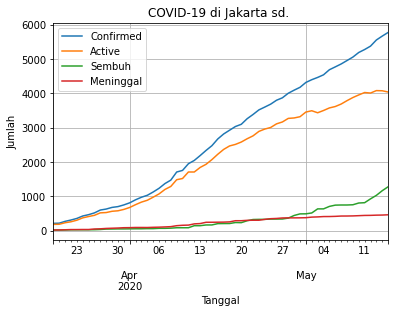

In [10]:


print("Pilih kasus covid yang ingin di visualisasikan")
print("1. Visualisasi Kasus Terkonfirmasi Positif Covid ")
print("2. Visualisasi Kasus Meninggal")
print("3. Visualisasi Kasus Sembuh")
print("4. Visualisasi Semua Kasus") 
print("5. Visualisasi Prediksi Covid") 


pilihan = int(input("Masukkan pilihan anda : "))
print("")
print("")




if pilihan == 1:
    try:
       #Menangani error pembacaan file
      df = (data_tabel_konfirmasi_kasus)
       #membaca data csv dan nama file nya adalah data tabel terkonfirmasi
    #  print(df.count())
    #Untuk melihat jumlah data pada setiap kolom    
    except:
       print("Cannot open " + data_tabel_konfirmasi_kasus)

    # convert kolom ke datetime
    df['Datetime'] = pd.to_datetime(df['Tanggal'])
    #tujuan untuk merubah format kolom tanggal ke format datetime agar data dapet terbaca saaat penampilan grafik 
    
    ## Axis adalah suatu area di dalam figure dimana data akan di plot.
    ax = df.plot(x='Datetime', y='Jakarta')
    judul = "Jumlah Kasus Terkonfirmasi COVID-19 di Daerah DKI Jakarta sd. 15/5/2020"
    plt.title(judul)
    plt.grid(True)
    plt.xlabel('Tanggal')
    plt.ylabel("Jumlah")

   
    


   
    
elif pilihan == 2:
    print("Data meninggal")
    try:
       df =(data_tabel_meninggal)
       #print(df.head())
    except:
       print("Cannot open " + data_tabel_meninggal)

    # convert the column to datetime
    df['Datetime'] = pd.to_datetime(df['Tanggal'])
    #print("output hasil convert date time")
    #print(df.Datetime)

    

    ax = df.plot(x='Datetime', y='Jakarta')

    plt.grid(True)

    judul = "Jumlah Meninggal COVID-19 di Daerah DKI Jakarta sd. " 
    plt.title(judul)
    plt.xlabel('Tanggal')
    plt.ylabel("Jumlah")







elif pilihan == 3:
    print("Data Sembuh")
    try:
       df = (data_tabel_sembuh)
       # print(df.head())
    except:
       print("Cannot open " + data_tabel_sembuh)

    # convert the column to datetime
    df['Datetime'] = pd.to_datetime(df['Tanggal'])
    #print(df.Datetime)

    

    ax = df.plot(x='Datetime', y='Jakarta')

    plt.grid(True)

    judul = "Jumlah Sembuh COVID-19 di Daerah DKI Jakarta sd. " 
    plt.title(judul)
    plt.xlabel('Tanggal')
    plt.ylabel("Jumlah")










elif pilihan == 4:
    print("Data Semua Kasus")
    try:
       df = (data_tabel_aktif)
       dg = (data_tabel_konfirmasi_kasus)
       dh = (data_tabel_meninggal)
       di = (data_tabel_sembuh)
       # print(df.head())
    except:
       print("Cannot open " + data_tabel_aktif)
       
       
       
    # convert the column to datetime
    df['Datetime'] = pd.to_datetime(df['Tanggal'])
    #print(df.Datetime)

    # convert the column to datetime
    df['Datetime'] = pd.to_datetime(df['Tanggal'])
    dg['Datetime'] = pd.to_datetime(dg['Tanggal'])
    dh['Datetime'] = pd.to_datetime(dh['Tanggal'])
    di['Datetime'] = pd.to_datetime(di['Tanggal'])
    #print(df.Datetime)
    # add dg,dh,di to df
    df['Confirmed'] = dg['Jakarta']
    df['Meninggal'] = dh['Jakarta']
    df['Sembuh'] = di['Jakarta']
   # print(df[['Datetime', 'Jakarta', 'Confirmed', 'Meninggal', 'Sembuh']])

    df = df.rename(columns={'Jakarta':'Active'})

   

    ax = df.plot(x='Datetime', y=['Confirmed','Active', 'Sembuh', 'Meninggal'])

    plt.grid(True)

    judul = "COVID-19 di Jakarta sd. " 
    plt.title(judul)
    plt.xlabel('Tanggal')
    plt.ylabel("Jumlah")
       
    

# Forecasting AR model



> Autoregression adalah model deret waktu yang menggunakan pengamatan dari langkah waktu sebelumnya sebagai masukan ke persamaan regresi untuk memprediksi nilai pada langkah waktu berikutnya



> Model regresi, seperti regresi linier, memodelkan nilai keluaran berdasarkan kombinasi linier dari nilai masukan.



> Adapun bentuk umum persamaan model AR dengan orde (p) dapat
dituliskan sebagai berikut
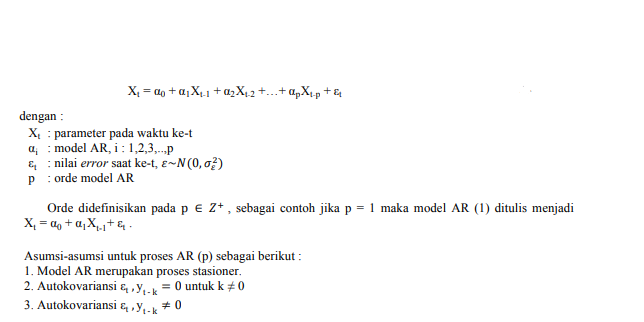






In [53]:
import pandas as pd
import numpy as np
%matplotlib inline

from statsmodels.tsa.ar_model import AR, ARResults



> Library Yang digunakan


1.   Pandas  Library pandas : library Python yang fokus untuk proses analisis data seperti manipulasi data, persiapan data, pembersihan data dan visualisasi data

2.   Numpy library Python yang berfungsi untuk proses komputasi numerik.
3.   Statsmodels 

fungsi library statsmodel untuk menyediakan serangkaian metode uji statistik dan pemodelan, serta alat yang didedikasikan untuk waktu
analisis seri yang juga dapat digunakan untuk peramalan.

 Fitur utama dari model Stats yang relevan dengan
peramalan deret waktu meliputi:


*   Plot analisis deret waktu seperti fungsi autokorelasi (ACF) dan autokorelasi parsial
*   Model deret waktu linier seperti autoregression (AR), moving average (MA)


  • 


    







# Load Data Untuk Prediksi

In [54]:
#Load data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('csv_for_prediction_cases_200515.csv', index_col = 'Tanggal', parse_dates=True)

Saving csv_for_prediction_cases_200515.csv to csv_for_prediction_cases_200515 (2).csv


In [55]:
df

,Jakarta
Tanggal,
2020-03-19,12
2020-03-20,12
2020-03-21,14
2020-03-22,15
2020-03-23,15
...,...
2020-10-25,31942
2020-10-26,32098
2020-10-27,32414


# Convert Kolom Tanggal ke Tipedata Datetime

In [56]:
df.index = [pd.Timestamp(d) for d in df.index]
df.index

DatetimeIndex(['2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22',
               '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26',
               '2020-03-27', '2020-03-28',
               ...
               '2020-10-20', '2020-10-21', '2020-10-22', '2020-10-23',
               '2020-10-24', '2020-10-25', '2020-10-26', '2020-10-27',
               '2020-10-28', '2020-10-29'],
              dtype='datetime64[ns]', length=225, freq=None)

In [14]:
dates = pd.date_range('2020-3-19','2020-10-29')
dg = pd.DataFrame(index=dates)
print (dg.index.freq)
dates

<Day>


DatetimeIndex(['2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22',
               '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26',
               '2020-03-27', '2020-03-28',
               ...
               '2020-10-20', '2020-10-21', '2020-10-22', '2020-10-23',
               '2020-10-24', '2020-10-25', '2020-10-26', '2020-10-27',
               '2020-10-28', '2020-10-29'],
              dtype='datetime64[ns]', length=225, freq='D')

# Grafik Kasus terkonfirmasi positif yang akan digunakan untuk prediksi

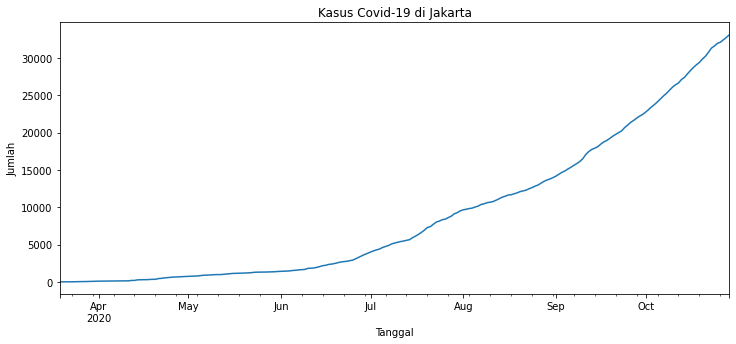

In [57]:
title='Kasus Covid-19 di Jakarta'
ylabel='Jumlah'
xlabel='Tanggal'

ax = df['Jakarta'].plot(figsize=(12,5),title=title);
ax.autoscale(axis='',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [38]:
len(df)

225

# Membagi data untuk train dan test


> Data train Digunakan Untuk Melatih Model 
*   Data train yang digunakan sebanyak 200





> 


> Data test Digunakan Untuk Mengetest Model
*   Data test yang digunakan adalah 25








In [58]:
train = df.iloc[:200]
test = df.iloc[200:]

In [59]:
train

,Jakarta
2020-03-19,12
2020-03-20,12
2020-03-21,14
2020-03-22,15
2020-03-23,15
...,...
2020-09-30,22435
2020-10-01,22734
2020-10-02,23078
2020-10-03,23450


In [60]:
import warnings
warnings.filterwarnings("ignore")

# Fit an AR(1) Model

In [43]:
model = AR(train['Jakarta'])
AR1fit = model.fit(maxlag=1,method='cmle')
print(f'Lag: {AR1fit.k_ar}')
print(f'Coefficients:\n{AR1fit.params}')

Lag: 1
Coefficients:
const         31.067645
L1.Jakarta     1.013610
dtype: float64


In [44]:
start=len(train)
end=len(train)+len(test)-1
predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

In [45]:
predictions1

2020-10-05    24118.492585
2020-10-06    24477.809768
2020-10-07    24842.017210
2020-10-08    25211.181469
2020-10-09    25585.370005
2020-10-10    25964.651198
2020-10-11    26349.094358
2020-10-12    26738.769740
2020-10-13    27133.748553
2020-10-14    27534.102976
2020-10-15    27939.906171
2020-10-16    28351.232294
2020-10-17    28768.156512
2020-10-18    29190.755014
2020-10-19    29619.105027
2020-10-20    30053.284827
2020-10-21    30493.373758
2020-10-22    30939.452242
2020-10-23    31391.601796
2020-10-24    31849.905046
2020-10-25    32314.445743
2020-10-26    32785.308779
2020-10-27    33262.580200
2020-10-28    33746.347222
2020-10-29    34236.698250
Freq: D, Name: AR(1) Predictions, dtype: float64

In [48]:
for i in range(len(predictions1)):
    print(f"predicted={predictions1[i]:<11.10}, expected={test['Jakarta'][i]}")

predicted=24118.49258, expected=24129
predicted=24477.80977, expected=24529
predicted=24842.01721, expected=24913
predicted=25211.18147, expected=25261
predicted=25585.37   , expected=25673
predicted=25964.6512 , expected=26083
predicted=26349.09436, expected=26401
predicted=26738.76974, expected=26640
predicted=27133.74855, expected=27106
predicted=27534.10298, expected=27392
predicted=27939.90617, expected=27864
predicted=28351.23229, expected=28307
predicted=28768.15651, expected=28723
predicted=29190.75501, expected=29079
predicted=29619.10503, expected=29395
predicted=30053.28483, expected=29844
predicted=30493.37376, expected=30218
predicted=30939.45224, expected=30731
predicted=31391.6018 , expected=31302
predicted=31849.90505, expected=31586
predicted=32314.44574, expected=31942
predicted=32785.30878, expected=32098
predicted=33262.5802 , expected=32414
predicted=33746.34722, expected=32732
predicted=34236.69825, expected=33100


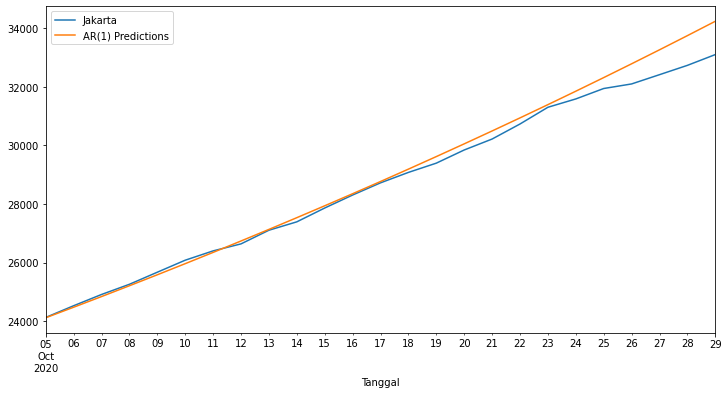

In [47]:
test['Jakarta'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6));

# Fit an AR(2) Model

In [49]:
AR2fit = model.fit(maxlag=2,method='cmle')
print(f'Lag: {AR2fit.k_ar}')
print(f'Coefficients:\n{AR2fit.params}')

Lag: 2
Coefficients:
const         15.724104
L1.Jakarta     1.530813
L2.Jakarta    -0.524345
dtype: float64


In [50]:
start=len(train)
end=len(train)+len(test)-1
predictions2 = AR2fit.predict(start=start, end=end, dynamic=False).rename('AR(2) Predictions')

In [51]:
predictions2 

2020-10-05    24098.061087
2020-10-06    24444.801633
2020-10-07    24800.433122
2020-10-08    25163.026564
2020-10-09    25531.615530
2020-10-10    25905.732052
2020-10-11    26285.166504
2020-10-12    26669.843361
2020-10-13    27059.756928
2020-10-14    27454.938088
2020-10-15    27855.437101
2020-10-16    28261.314714
2020-10-17    28672.637564
2020-10-18    29089.475811
2020-10-19    29511.901912
2020-10-20    29939.989998
2020-10-21    30373.815561
2020-10-22    30813.455288
2020-10-23    31258.986994
2020-10-24    31710.489588
2020-10-25    32168.043060
2020-10-26    32631.728488
2020-10-27    33101.628041
2020-10-28    33577.824995
2020-10-29    34060.403744
Freq: D, Name: AR(2) Predictions, dtype: float64

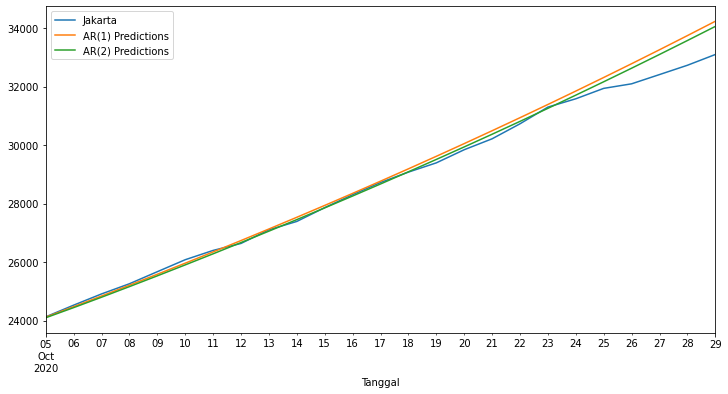

In [52]:
test['Jakarta'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True,figsize=(12,6));

# Fit an AR(p) model where statsmodels chooses p
This time we'll omit the maxlag argument in AR.fit() and let statsmodels choose a p-value for us.

In [29]:
ARfit = model.fit(method='cmle')
print(f'Lag: {ARfit.k_ar}')
print(f'Coefficients:\n{ARfit.params}')

Lag: 14
Coefficients:
const          9.820072
L1.Jakarta     1.474617
L2.Jakarta    -0.329797
L3.Jakarta    -0.196122
L4.Jakarta     0.079284
L5.Jakarta     0.089529
L6.Jakarta    -0.250331
L7.Jakarta     0.313412
L8.Jakarta    -0.227776
L9.Jakarta     0.253273
L10.Jakarta   -0.416191
L11.Jakarta    0.208951
L12.Jakarta   -0.021230
L13.Jakarta    0.178568
L14.Jakarta   -0.153446
dtype: float64


In [30]:
start = len(train)
end = len(train)+len(test)-1
rename = f'AR(14) Predictions'

predictions14 = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

In [31]:
predictions14

2020-10-05    24089.608567
2020-10-06    24391.359578
2020-10-07    24738.959908
2020-10-08    25083.389077
2020-10-09    25434.037527
2020-10-10    25803.279677
2020-10-11    26170.921159
2020-10-12    26547.024326
2020-10-13    26889.105915
2020-10-14    27252.371534
2020-10-15    27618.840169
2020-10-16    28011.555958
2020-10-17    28400.866796
2020-10-18    28791.605284
2020-10-19    29188.551442
2020-10-20    29584.394062
2020-10-21    29990.909623
2020-10-22    30390.456245
2020-10-23    30809.084622
2020-10-24    31230.688855
2020-10-25    31664.391334
2020-10-26    32094.569667
2020-10-27    32527.633341
2020-10-28    32968.057251
2020-10-29    33412.610900
Freq: D, Name: AR(14) Predictions, dtype: float64

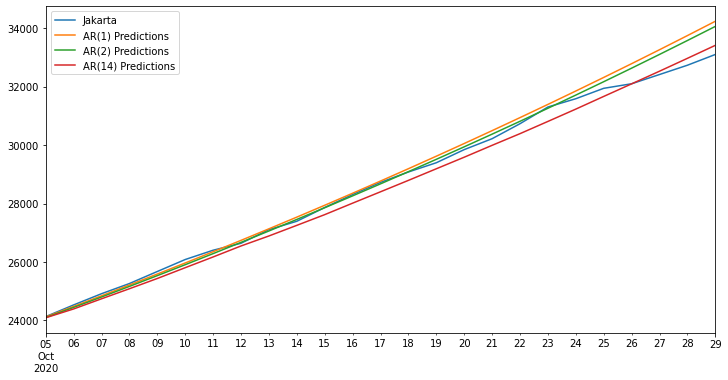

In [32]:
test['Jakarta'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions14.plot(legend=True,figsize=(12,6));

# Evaluasi Model
 Membantu untuk memiliki sarana perbandingan antara dua atau lebih model. Salah satu metode umum adalah menghitung Mean Squared Error (MSE), tersedia dari scikit-learn.

In [33]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(2)','AR(14)']
preds = [predictions1, predictions2, predictions14]  

for i in range(3):
    error = mean_squared_error(test['Jakarta'], preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

AR(1) Error: 161230.3008
AR(2) Error: 104993.5538
AR(14) Error: 62790.48126


# Prediksi

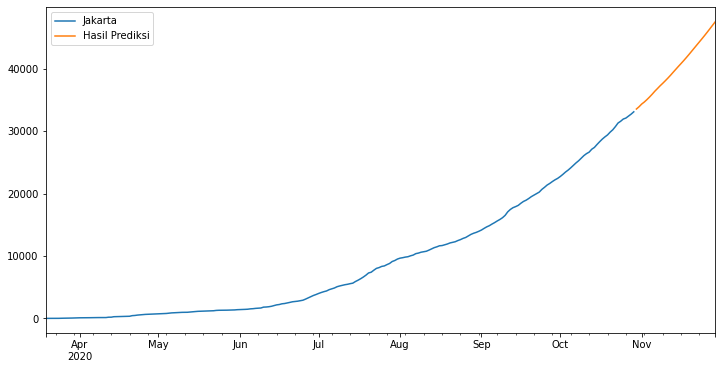

In [62]:
# Pertama, latih kembali model dengan data lengkap
model = AR(df['Jakarta'])

# Next, fit the model
ARfit = model.fit(maxlag=14,method='cmle')

# Membuat Prediksi untuk 15 hari kedepan dari data terahir
fcast = ARfit.predict(start=len(df), end=len(df)+30, dynamic=False).rename('Hasil Prediksi')

# Hasil Prediksi
df['Jakarta'].plot(legend=True)
fcast.plot(legend=True,figsize=(12,6));

In [41]:
fcast

2020-10-30    33543.782695
2020-10-31    33906.732868
2020-11-01    34336.926735
2020-11-02    34664.811546
2020-11-03    35049.805556
2020-11-04    35465.458323
2020-11-05    35913.790668
2020-11-06    36389.606801
2020-11-07    36816.391475
2020-11-08    37252.970991
2020-11-09    37653.175504
2020-11-10    38071.149585
2020-11-11    38503.479660
2020-11-12    38955.457279
2020-11-13    39434.900584
2020-11-14    39905.380078
2020-11-15    40374.295753
2020-11-16    40829.765270
2020-11-17    41295.801464
2020-11-18    41777.338773
2020-11-19    42272.459214
2020-11-20    42781.635087
2020-11-21    43291.046185
2020-11-22    43801.217816
2020-11-23    44307.266893
2020-11-24    44816.547379
2020-11-25    45335.801130
2020-11-26    45867.502880
2020-11-27    46410.927416
2020-11-28    46958.220698
2020-11-29    47507.749371
Freq: D, Name: Hasil Prediksi, dtype: float64